In [1]:
import xarray as xr
trial_nc = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\results\trial.nc'
nc = xr.open_dataset(trial_nc)
display(nc)

<xarray.Dataset> Size: 10kB
Dimensions:        (ac: 2, time: 31)
Coordinates:
  * time           (time) int32 124B 2020 2021 2022 2023 ... 2047 2048 2049 2050
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/20)
    emis_CO2       (ac, time) float64 496B ...
    emis_distance  (ac, time) float64 496B ...
    emis_H2O       (ac, time) float64 496B ...
    emis_NOx       (ac, time) float64 496B ...
    conc_CH4       (ac, time) float64 496B ...
    conc_CO2       (ac, time) float64 496B ...
    ...             ...
    dT_CO2         (ac, time) float64 496B ...
    dT_cont        (ac, time) float64 496B ...
    dT_H2O         (ac, time) float64 496B ...
    dT_O3          (ac, time) float64 496B ...
    dT_PMO         (ac, time) float64 496B ...
    dT_SWV         (ac, time) float64 496B ...
Attributes:
    title:        trial
    created:      2025-09-03 14:23:43
    user:         atzeh
    oac version:  0.11.1

[   0.           -7.6405135   -15.29281877  -22.95952342  -30.6390948
  -38.32463679  -45.97011955  -53.5021869   -60.92288303  -68.24044497
  -75.46738162  -82.62047377  -89.72045003  -96.76272789 -103.75720333
 -110.7314671  -117.70964195 -124.71238258 -131.75687568 -138.85683989
 -146.02252583 -153.26071609 -160.57472525 -167.96439984 -175.42611836
 -182.9527913  -190.5354787  -198.20710963 -205.97457654 -213.82400074
 -221.74225443]
[   0.           -7.6405135   -15.29281877  -22.95952342  -30.6390948
  -38.32463679  -45.97011955  -53.5021869   -60.92288303  -68.24044497
  -75.46738162  -82.62047377  -89.72045003  -96.76272789 -103.75720333
 -110.7314671  -117.70964195 -124.71238258 -131.75687568 -138.85683989
 -146.02252583 -153.26071609 -160.57472525 -167.96439984 -175.42611836
 -182.9527913  -190.5354787  -198.20710963 -205.97457654 -213.82400074
 -221.74225443]


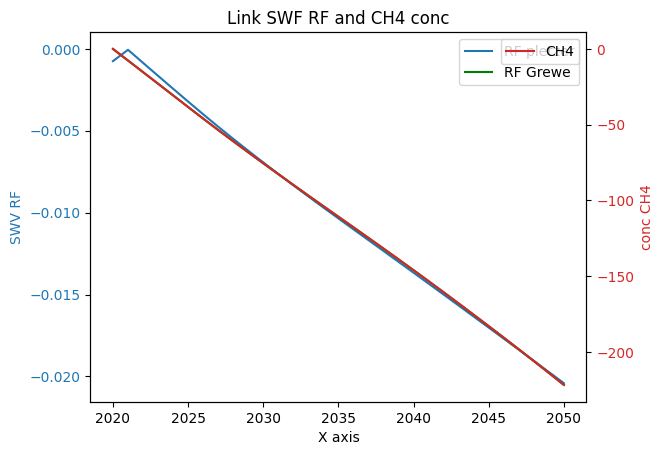

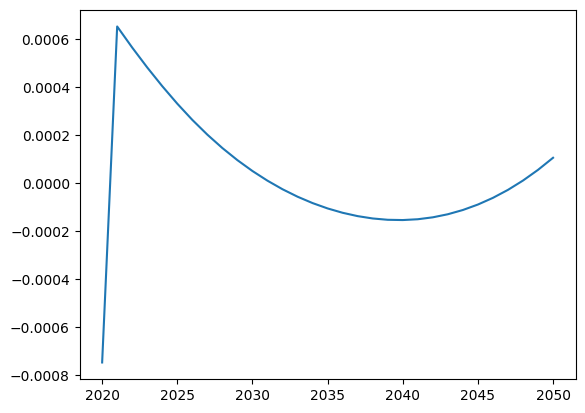

array([-7.46760000e-04,  6.53947178e-04,  5.66052819e-04,  4.83072980e-04,
        4.05051375e-04,  3.32076830e-04,  2.64552473e-04,  2.02974410e-04,
        1.47106212e-04,  9.66792410e-05,  5.14232118e-05,  1.10786881e-05,
       -2.45891984e-05, -5.56594965e-05, -8.22723189e-05, -1.04594454e-04,
       -1.22717880e-04, -1.36670428e-04, -1.46426032e-04, -1.51914761e-04,
       -1.53032833e-04, -1.49652741e-04, -1.41633608e-04, -1.28831835e-04,
       -1.11112084e-04, -8.83585869e-05, -6.04802725e-05, -2.72132402e-05,
        1.16563946e-05,  5.62382720e-05,  1.06611327e-04])

In [2]:
# Example data
import numpy as np
import matplotlib.pyplot as plt
x = nc.coords['time'].values
# np.linspace(0, 10, 100)
y1 = nc['RF_SWV'][0].values          # first dataset (larger scale)
y2 = nc['conc_CH4'][0].values          # second dataset (smaller scale)
# GREWE way of RF calc
y3 = nc['conc_CH4'][0].values * 0.21129757195261092 * 4.38*10**-4 
print(nc['conc_CH4'][0].values)
print(nc['conc_CH4'][1].values)
# Create the figure and first axis
fig, ax1 = plt.subplots()

# Plot the first dataset on ax1
color = 'tab:blue'
ax1.set_xlabel('X axis')
ax1.set_ylabel('SWV RF', color=color)
ax1.plot(x, y1, color=color, label='RF pletzer')
ax1.plot(x, y3, color="green", label='RF Grewe')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('conc CH4', color=color)
ax2.plot(x, y2, color=color, label='CH4')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()

# Show plot
plt.title("Link SWF RF and CH4 conc")

plt.show()

plt.plot(x, y1-y3)
plt.show()
y1-y3

In [3]:
import numpy as np
c = {'SWV': np.array([-7.46760000e-04, -5.31696369e-05, -8.49272119e-04, -1.64179272e-03,
       -2.43054588e-03, -3.21480455e-03, -3.98990562e-03, -4.74856399e-03,
       -5.49120527e-03, -6.21886042e-03, -6.93295742e-03, -7.63530872e-03,
       -8.32806760e-03, -9.01088900e-03, -9.68482889e-03, -1.03526075e-02,
       -1.10165494e-02, -1.16785940e-02, -1.23403057e-02, -1.30028843e-02,
       -1.36671747e-02, -1.43336771e-02, -1.50025573e-02, -1.56736576e-02,
       -1.63465075e-02, -1.70203351e-02, -1.76942219e-02, -1.83709515e-02,
       -1.90509480e-02, -1.97328173e-02, -2.04152655e-02])}

b =  {'SWV': np.array([-7.46760000e-04, -1.57444583e-05, -7.74827915e-04, -1.53072541e-03,
       -2.28326120e-03, -3.03174247e-03, -3.77171727e-03, -4.49622363e-03,
       -5.20565775e-03, -5.90099480e-03, -6.58359062e-03, -7.25517039e-03,
       -7.91778739e-03, -8.57110668e-03, -9.21613392e-03, -9.85546966e-03,
       -1.04913387e-02, -1.11255996e-02, -1.17597544e-02, -1.23949571e-02,
       -1.30320234e-02, -1.36714396e-02, -1.43133719e-02, -1.49576761e-02,
       -1.56039080e-02, -1.62513331e-02, -1.68990751e-02, -1.75498172e-02,
       -1.82039769e-02, -1.88602227e-02, -1.95173176e-02])}

print(b['SWV']-c["SWV"])
print(1/(b['SWV']/(b['SWV']-c["SWV"])))
print('This means that most of the differences is below 7.5% exept for the first 2 values where the value is so small that the sign matters a lot')
print('max absolute error =', max(b['SWV']-c["SWV"]), "W/m^2")

[0.00000000e+00 3.74251786e-05 7.44442040e-05 1.11067310e-04
 1.47284680e-04 1.83062080e-04 2.18188350e-04 2.52340360e-04
 2.85547520e-04 3.17865620e-04 3.49366800e-04 3.80138330e-04
 4.10280210e-04 4.39782320e-04 4.68694970e-04 4.97137840e-04
 5.25210700e-04 5.52994400e-04 5.80551300e-04 6.07927200e-04
 6.35151300e-04 6.62237500e-04 6.89185400e-04 7.15981500e-04
 7.42599500e-04 7.69002000e-04 7.95146800e-04 8.21134300e-04
 8.46971100e-04 8.72594600e-04 8.97947900e-04]
[-0.         -2.37703819 -0.09607837 -0.07255861 -0.06450628 -0.0603818
 -0.05784854 -0.05612273 -0.0548533  -0.05386645 -0.0530663  -0.05239551
 -0.05181753 -0.05130986 -0.05085592 -0.05044284 -0.05006136 -0.04970468
 -0.04936764 -0.04904633 -0.04873773 -0.04843949 -0.04814976 -0.04786716
 -0.04759061 -0.04731932 -0.04705268 -0.04678877 -0.04652671 -0.0462664
 -0.04600775]
This means that most of the differences is below 7.5% exept for the first 2 values where the value is so small that the sign matters a lot
max absolu

C:\Users\atzeh\AppData\Local\Temp\ipykernel_2584\2017079875.py:21: RuntimeWarning: divide by zero encountered in divide
  print(1/(b['SWV']/(b['SWV']-c["SWV"])))


In [4]:
p = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\resp_RF.nc'
import xarray as xr
xr1 = xr.open_dataset(p)
display(xr1)

<xarray.Dataset> Size: 5kB
Dimensions:       (emi_lat: 7, emi_plev: 12, emi_lat_min: 7, emi_lat_max: 7,
                   emi_plev_min: 12, emi_plev_max: 12)
Coordinates:
  * emi_lat       (emi_lat) float32 28B -72.5 -45.0 -15.0 15.0 37.5 52.0 74.0
  * emi_plev      (emi_plev) float32 48B 52.5 102.5 131.5 ... 499.0 657.0 968.0
  * emi_lat_min   (emi_lat_min) float32 28B -89.0 -59.0 -30.0 0.0 30.0 45.0 59.0
  * emi_lat_max   (emi_lat_max) float32 28B -59.0 -30.0 0.0 30.0 45.0 59.0 89.0
  * emi_plev_min  (emi_plev_min) float32 48B 47.0 96.0 124.0 ... 634.0 949.0
  * emi_plev_max  (emi_plev_max) float32 48B 58.0 109.0 139.0 ... 680.0 986.0
Data variables:
    emi_air_mass  (emi_lat, emi_plev) float64 672B ...
    emi_loc       (emi_lat, emi_plev) <U9 3kB ...
    H2O           (emi_lat, emi_plev) float32 336B ...
    O3            (emi_lat, emi_plev) float32 336B ...
Attributes:
    Title:       Response: Emission -> Radiative Forcing
    resp_type:   rf
    Convention:  CF-XXX
    Reference:   Grewe, V., & Stenke, A. (2008). AirClim: an efficient tool f...
    URL:         https://doi.org/10.5194/acp-8-4621-2008

In [2]:
scaling_p =r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\input\time_norm_examplexxxxxxxxxxx.nc'
import xarray as xr
scaling = xr.open_dataset(scaling_p)
display(scaling)
scaling.data_vars['scaling'].values


<xarray.Dataset> Size: 420B
Dimensions:       (time: 21)
Coordinates:
  * time          (time) int32 84B 2020 2025 2030 2035 ... 2105 2110 2115 2120
Data variables:
    fuel          (time) float32 84B ...
    EI_CO2        (time) float32 84B ...
    EI_H2O        (time) float32 84B ...
    dis_per_fuel  (time) float32 84B ...
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

KeyError: "No variable named 'scaling'. Variables on the dataset include ['fuel', 'EI_CO2', 'EI_H2O', 'dis_per_fuel', 'time']"